# Diferencia o cambios en los valores meteorológicos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

## Función

Misma funcíon del archivo`analysis3.ipynb`en la que se extrae el promedio de los valores por estación, día y parámetro a lo largo de las temporadas (primavera, verano otoño e invierno) y funciones adicionales que miden la diferencia por hora y por año (este último promedidando sus valores)

In [2]:
data_2017 = pd.read_csv("Data/meteorology2017.csv")
data_2018 = pd.read_csv("Data/meteorology2018.csv")
data_2019 = pd.read_csv("Data/meteorology2019.csv")
data_2020 = pd.read_csv("Data/meteorology2020.csv")

data = data_2020.append(data_2019.append(data_2018.append(data_2017)))
data["dateUTCShiftedDown"] = pd.to_datetime(data["dateUTCShiftedDown"])

def hour_year(estacion, dia, parametro):
    data1 = data[(data["id_station_id"] == estacion) & (data["dateUTCShiftedDown"].dt.day == dia) &
                 (data["id_parameter_id"] == parametro)][["dateUTCShiftedDown","original"]]

    primavera = data1[(data1["dateUTCShiftedDown"].dt.month == 3) | (data1["dateUTCShiftedDown"].dt.month == 4) | 
                      (data1["dateUTCShiftedDown"].dt.month == 5)]

    verano = data1[(data1["dateUTCShiftedDown"].dt.month == 6) | (data1["dateUTCShiftedDown"].dt.month == 7) | 
                   (data1["dateUTCShiftedDown"].dt.month == 8)]

    otono = data1[(data1["dateUTCShiftedDown"].dt.month == 9) | (data1["dateUTCShiftedDown"].dt.month == 10) | 
                  (data1["dateUTCShiftedDown"].dt.month == 11)]

    invierno = data1[(data1["dateUTCShiftedDown"].dt.month == 12) | (data1["dateUTCShiftedDown"].dt.month == 1) | 
                     (data1["dateUTCShiftedDown"].dt.month == 2)]
    return [[primavera, verano, otono, invierno], data1]

def plot_hour(est,dia,para):
    temporadas = hour_year(est, dia, para)[0]
    seasons = [[],[],[],[]]
    for i in range(4):
        for hour in range(0,24):
            seasons[i].append(temporadas[i][temporadas[i]["dateUTCShiftedDown"].dt.hour == hour]["original"].mean())

    seasons = np.array(seasons)
    dif_per_hour_p_v = abs(seasons[0]-seasons[1])
    dif_per_hour_v_o = abs(seasons[1]-seasons[2])
    dif_per_hour_o_i = abs(seasons[2]-seasons[3])
    dif_per_hour_i_p = abs(seasons[3]-seasons[0])
    dif_per_hour_p_o = abs(seasons[0]-seasons[2])

    fig, axs = plt.subplots()
    fig.set_size_inches(18.5,10,5)

    axs.plot(np.arange(0,24,1),dif_per_hour_p_v,label="Primavera-Verano")
    axs.plot(np.arange(0,24,1),dif_per_hour_v_o,label="Verano-Otoño")
    axs.plot(np.arange(0,24,1),dif_per_hour_o_i,label="Otoño-Invierno")
    axs.plot(np.arange(0,24,1),dif_per_hour_i_p,label="Invierno-Primavera")
    #axs.plot(np.arange(0,24,1),dif_per_hour_p_o,label="Primavera-Otoño")

    axs.set_title("Diferencia de temperatura del 2017-2020 promediado por hora")
    axs.legend()
    
def plot_years(est,dia,para):
    data1 = hour_year(est, dia, para)[1]
    years = [[],[],[],[]]
    year = [2017,2018,2019,2020]
    for i in range(4):
        for hour in range(0,24):
            years[i].append(data1[(data1["dateUTCShiftedDown"].dt.year == year[i]) & 
                                  (data1["dateUTCShiftedDown"].dt.hour == hour)]["original"].mean())
    years = np.array(years)

    dif_per_hour_2017_2018 = abs(years[0]-years[1])
    dif_per_hour_2018_2019 = abs(years[1]-years[2])
    dif_per_hour_2019_2020 = abs(years[2]-years[3])
    dif_per_hour_2020_2017 = abs(years[3]-years[0])
    dif_per_hour_2017_2019 = abs(years[0]-years[2])

    fig, axs = plt.subplots()
    fig.set_size_inches(18.5,10,5)

    axs.plot(np.arange(0,24,1),dif_per_hour_2017_2018,label="2017_2018")
    axs.plot(np.arange(0,24,1),dif_per_hour_2018_2019,label="2018_2019")
    axs.plot(np.arange(0,24,1),dif_per_hour_2019_2020,label="2019_2020")
    axs.plot(np.arange(0,24,1),dif_per_hour_2020_2017,label="2020_2017")
    axs.plot(np.arange(0,24,1),dif_per_hour_2017_2019,label="2017-2019")

    axs.set_title("Diferencia de temperatura entre años promediado por hora")
    axs.legend()

Se observa que la diferencia de temporada de valores por hora, por ejemplo, entre invierno y primavera difieren más a comparación de la diferencia en años. Y se demuestra que para ciertas temporadas, la diferencia es "buena" (También en `analysis6.ipynb` se demuestra esto con una autocorrelación parcial de la serie)

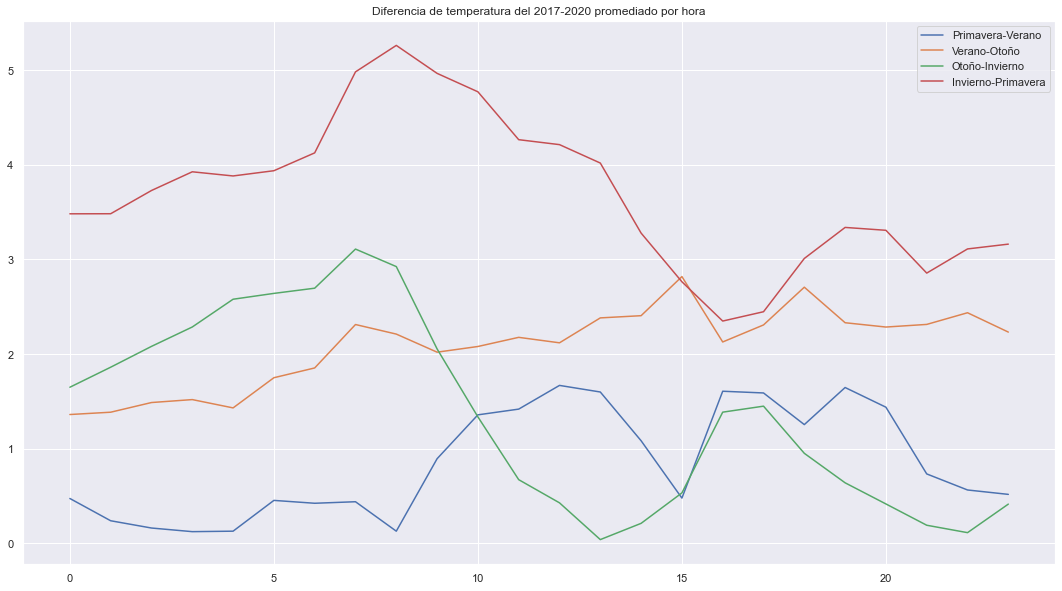

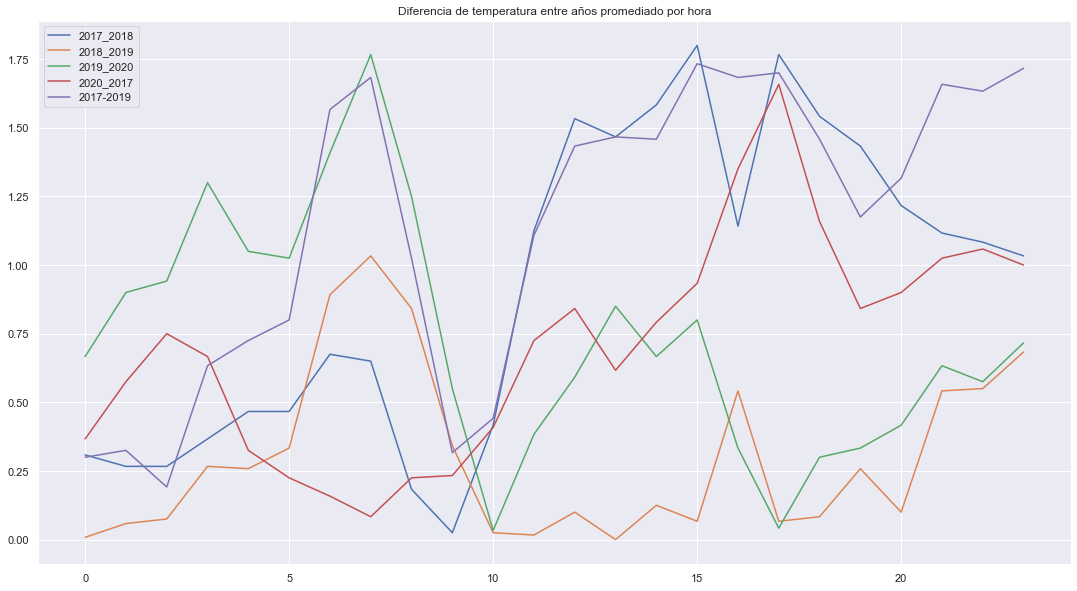

In [3]:
plot_hour("UAX", 16, "TMP")
plot_years("UAX", 16, "TMP")

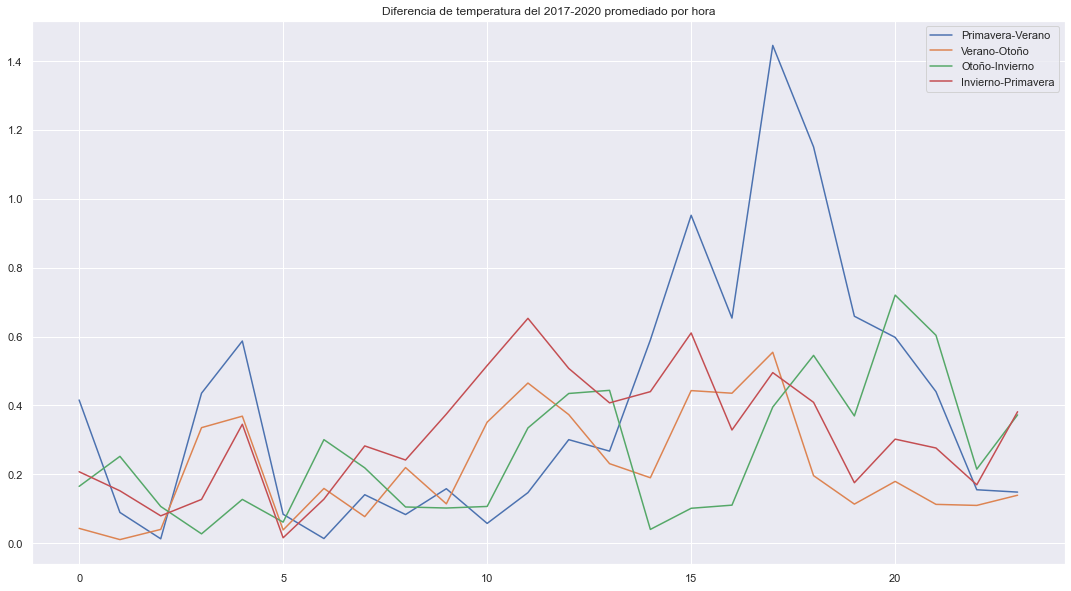

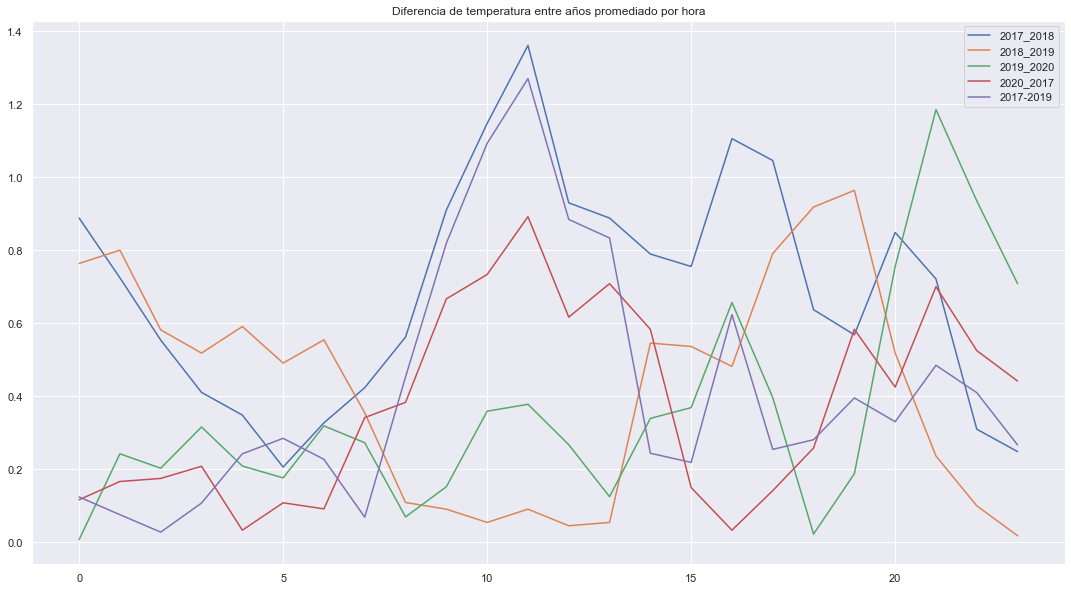

In [4]:
plot_hour("UAX", 16, "WSP")
plot_years("UAX", 16, "WSP")

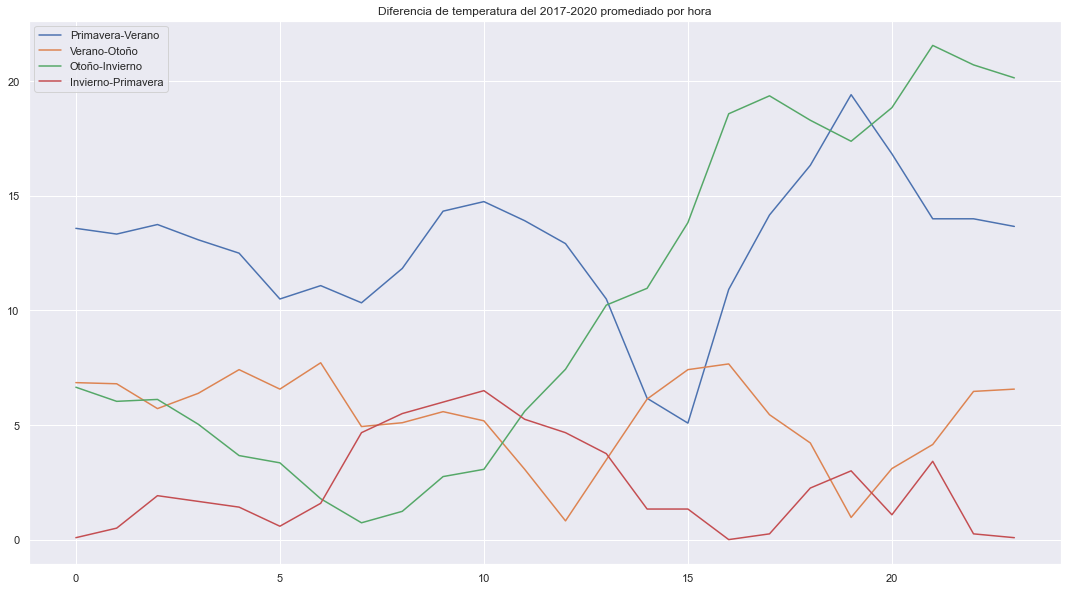

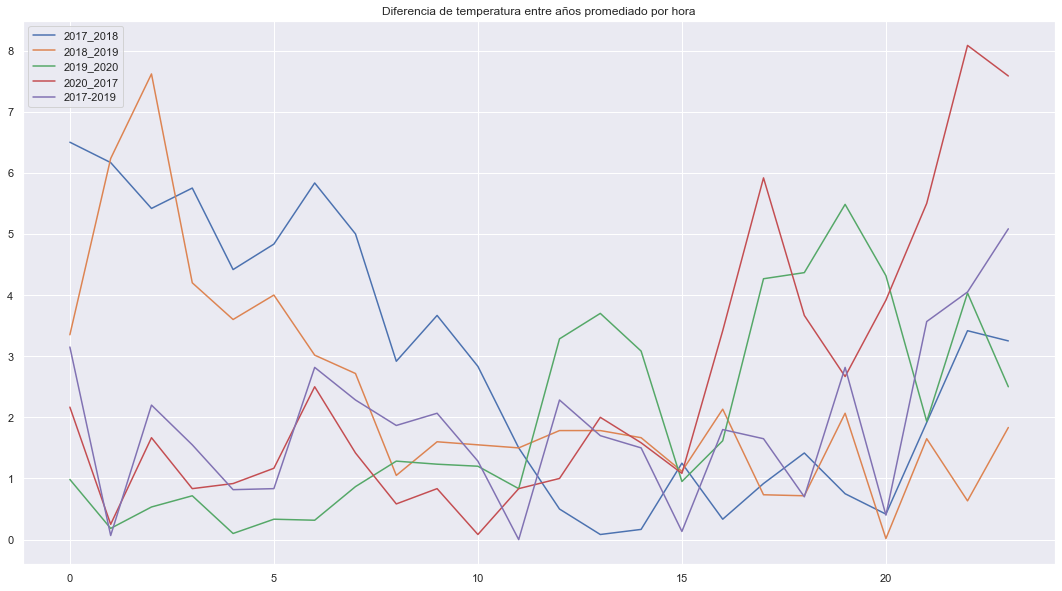

In [5]:
plot_hour("UAX", 16, "RH")
plot_years("UAX", 16, "RH")

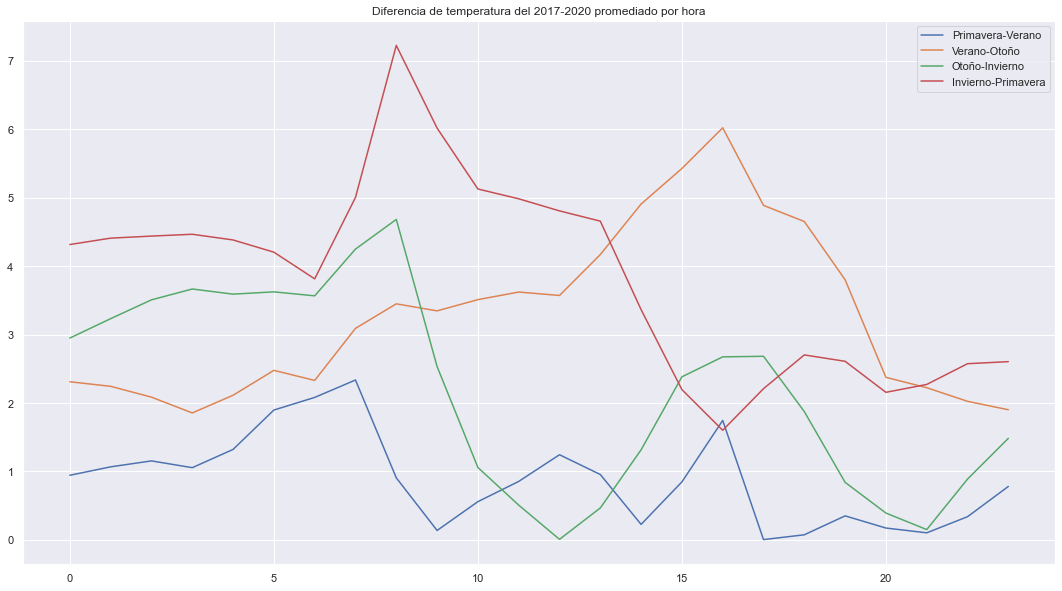

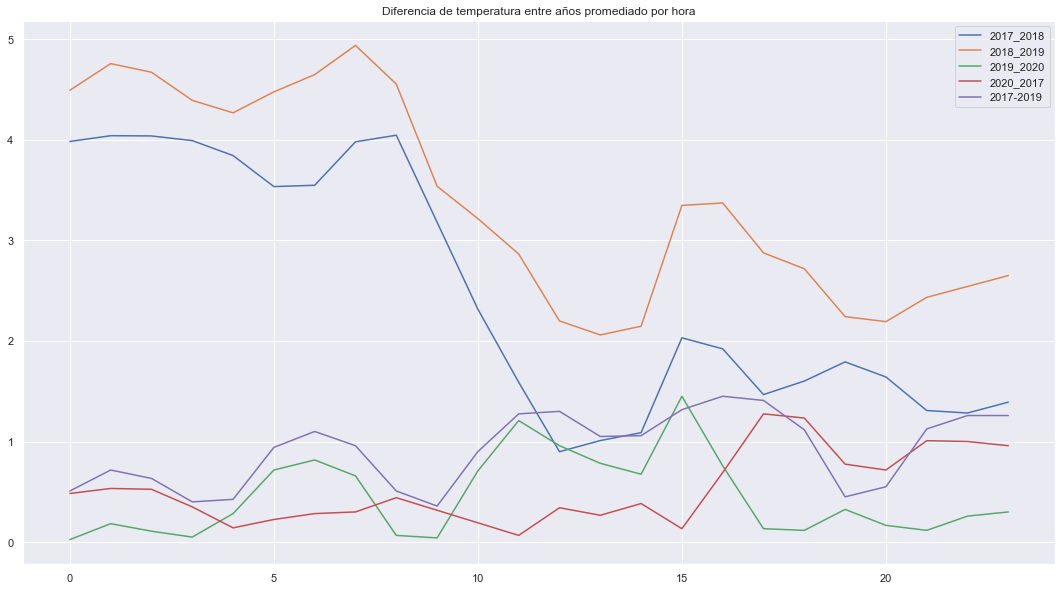

In [6]:
plot_hour("FAC", 16, "TMP")
plot_years("FAC", 16, "TMP")

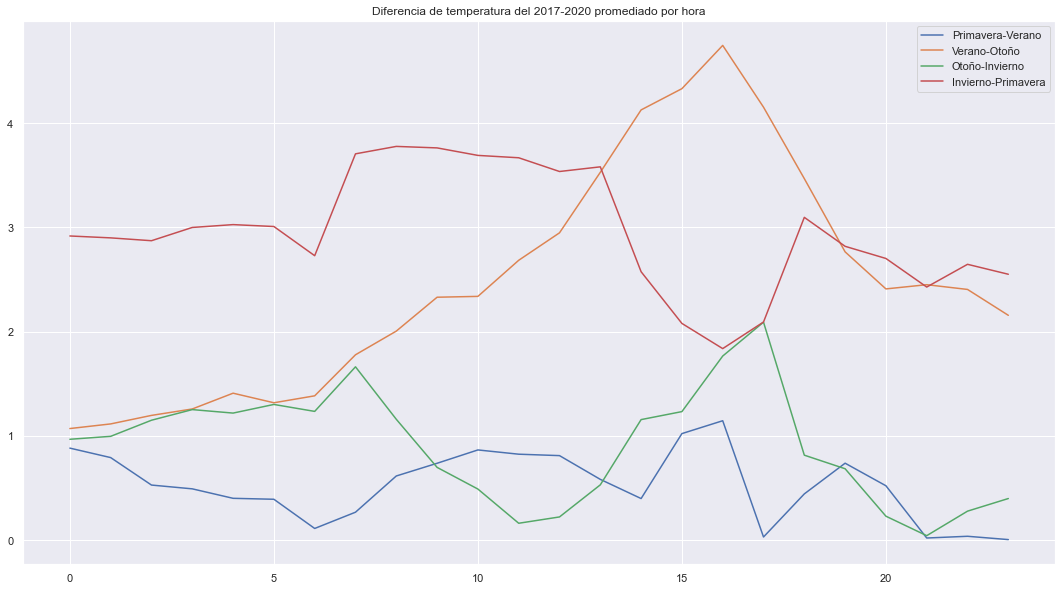

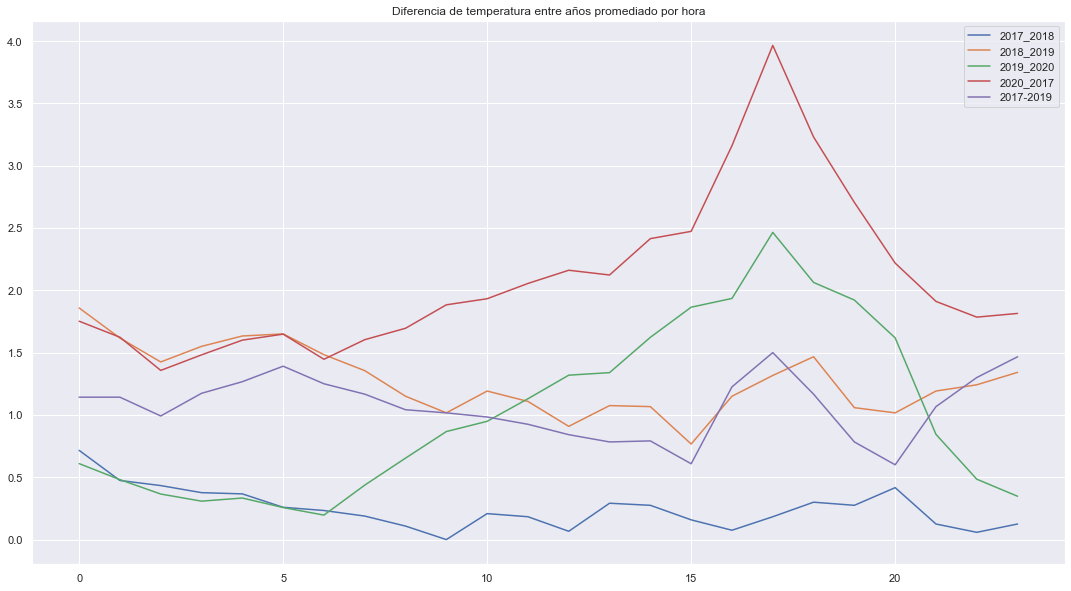

In [7]:
plot_hour("CUA", 16, "TMP")
plot_years("CUA", 16, "TMP")

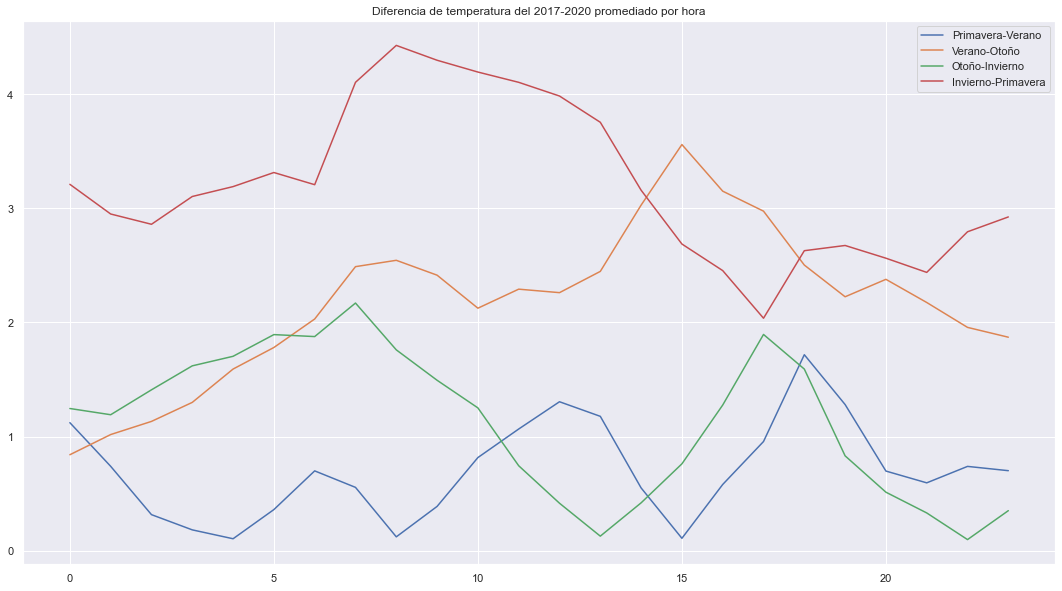

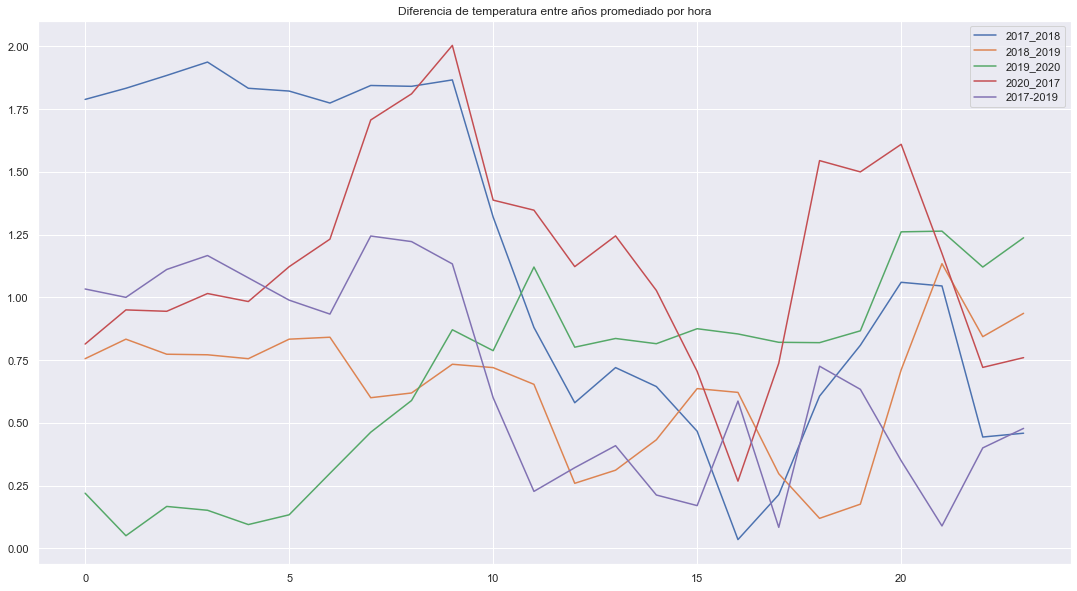

In [8]:
plot_hour("HGM", 16, "TMP")
plot_years("HGM", 16, "TMP")

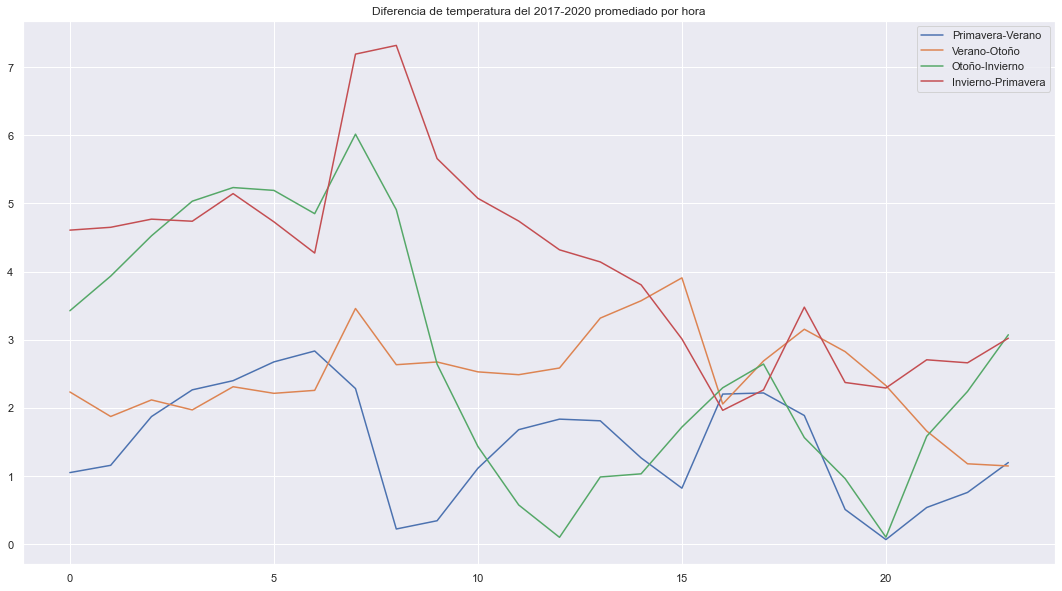

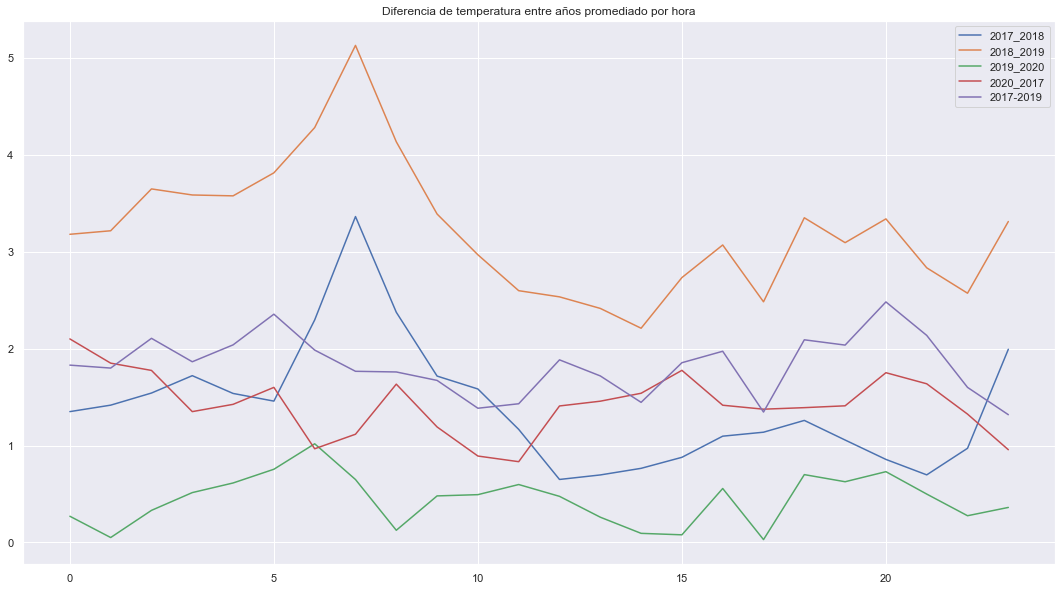

In [9]:
plot_hour("CUT", 16, "TMP")
plot_years("CUT", 16, "TMP")

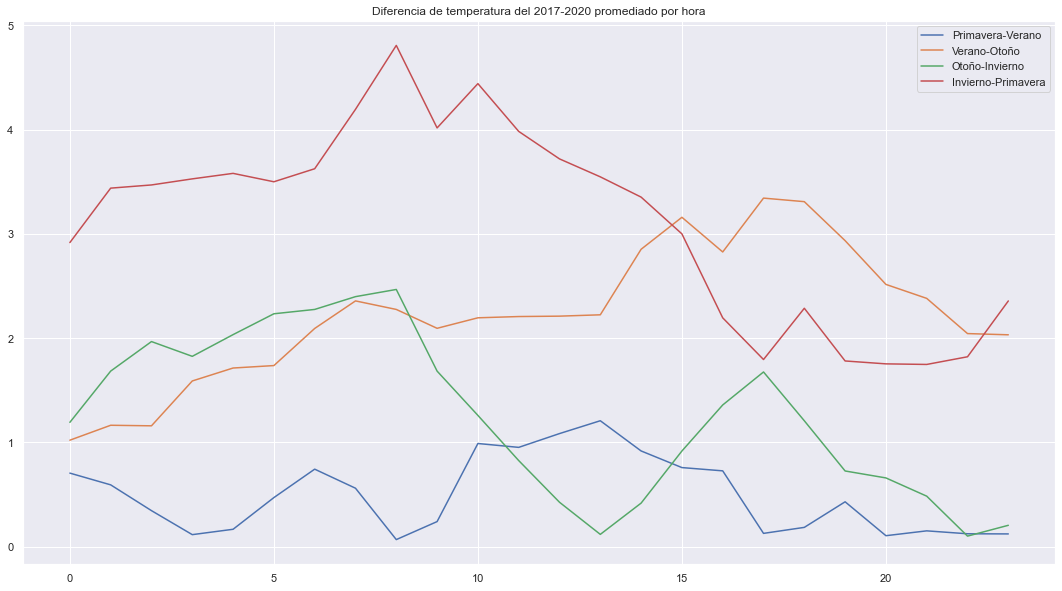

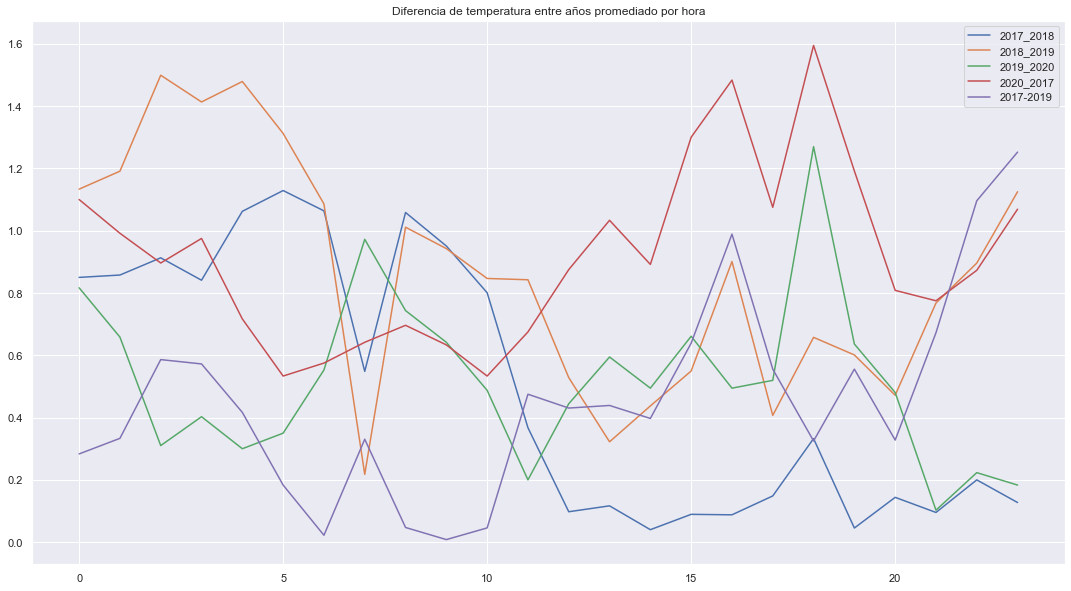

In [10]:
plot_hour("XAL", 16, "TMP")
plot_years("XAL", 16, "TMP")

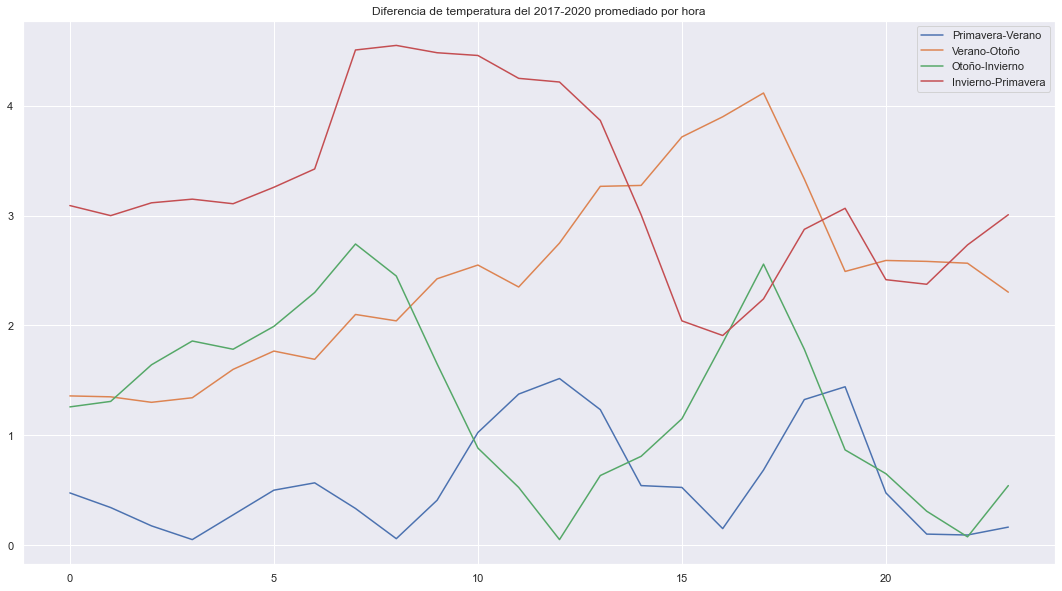

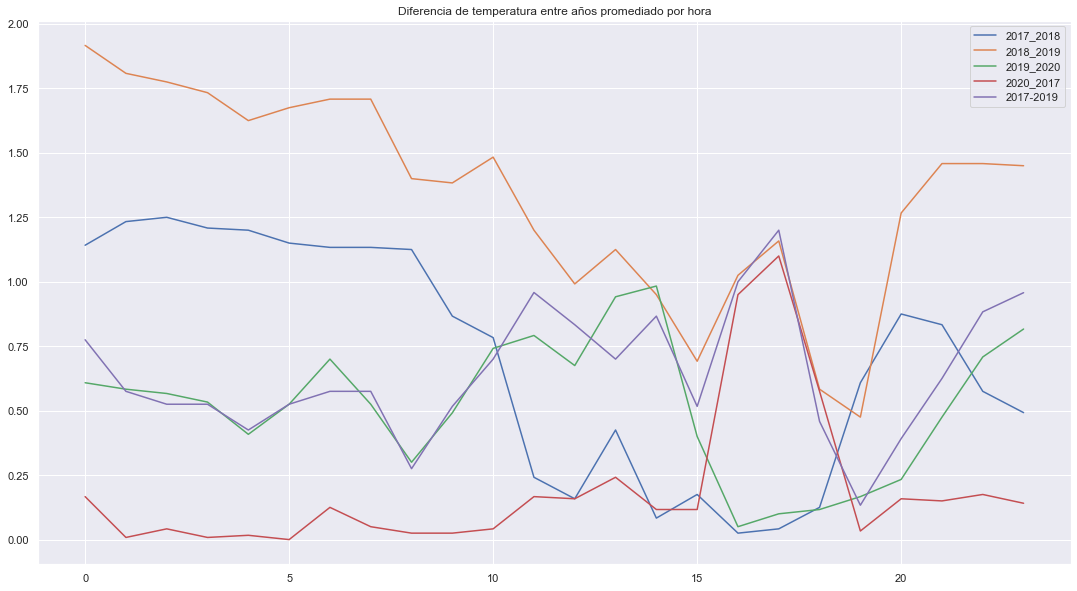

In [11]:
plot_hour("PED", 16, "TMP")
plot_years("PED", 16, "TMP")

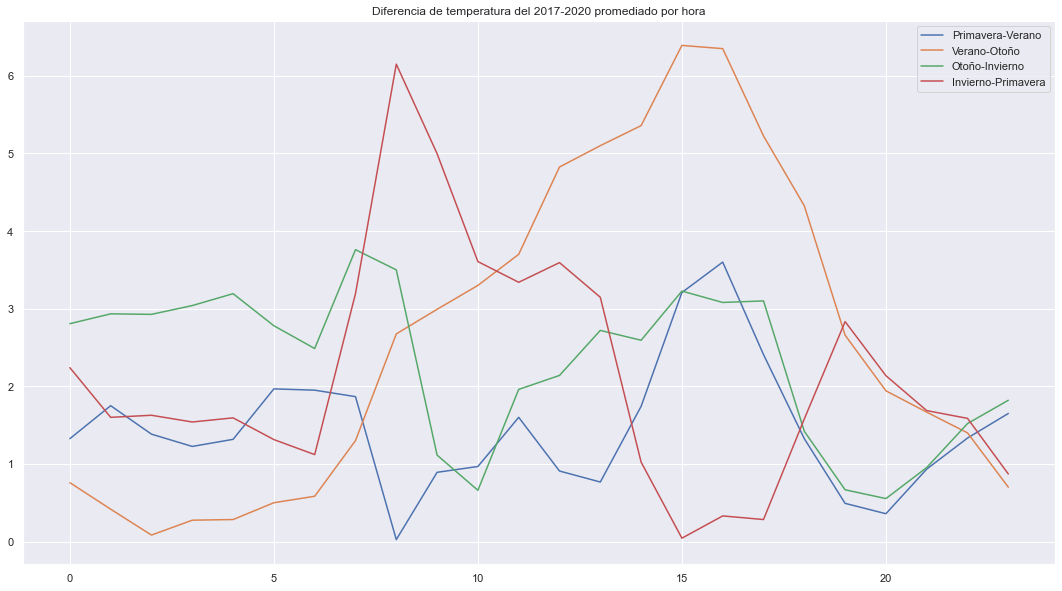

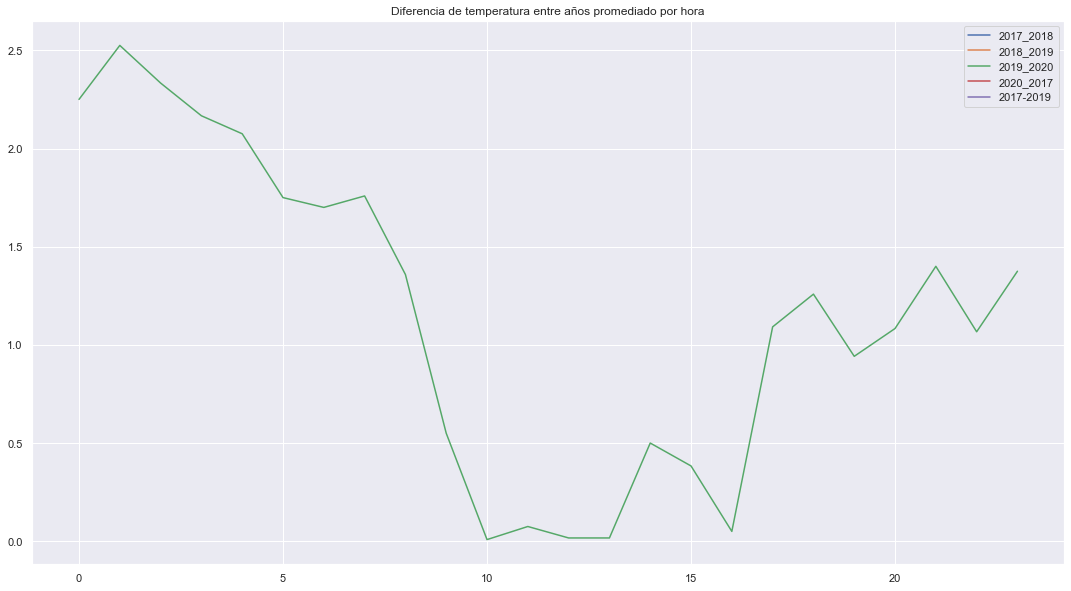

In [12]:
plot_hour("INN", 16, "TMP")
plot_years("INN", 16, "TMP")